# TIDES Workshop: Instaseis Tutorial

**Goal of the Practical:** To be able to calculate seismograms on a 1D background model with Instaseis.


**Tenative Timetable:**

* [10 min] Introduction and getting everyone on the same page
* [20 min] Instaseis GUI
* [45 min] Use Instaseis to seismograms for the same earthquakes and stations as the last days.
* [30 - x min] Advanced exercises

**Tasks:**

* Play with GUI: mechanism, depth, location, arrival times...
* Calculate synthetics for the given events and stations
* Plot record section
* Finite Source, compare to point source solution, in GUI?
* PGA as a function of distance, source depth
* compare meteorite impact to earthquake (plot spectra)

## Exercise 1: Play around with the GUI

The GUI is great tool to teach and observe basic properties of seismograms. Launch it by entering

```bash
$ python -m instaseis.gui
```

in a shell.

<img style="width:60%" src="instaseis_images/GUI_screenshot.png"></img>


#### Tasks:

1. Modify the source depth; observe how surface waves behave.
2. Observe how the polarity of the first arrivals flips when crossing nodal planes of a double couple source.
3. Observe triplicated phases for shallow sources
4. Observe the Hilbert transformed shape of reflected phases.

-----

Basic four lines (as always).

In [1]:
%pylab inline
from __future__ import print_function
import matplotlib.pylab as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


-----

## Basic Instaseis Usage

Please have a look at our webpage - http://www.instaseis.net/ - where everything is documented extensively.

### Opening a Database

Before you can get going you have to (as always in Python) import `instaseis`.

In [2]:
import instaseis

An Instaseis database must be opened before it can be used. Please keep in mind that this is by far the most expensive operation in Instaseis so you want to limit how often you do it. There are a couple of optional parameters here, for now the defaults are fine.

The virtual box has a database at

**~/path/to/db/bla**

In [3]:
db = instaseis.open_db("/Users/lion/workspace/code/axisem/SOLVER/20s_PREM_ANI_FORCES")

Some basic information about the loaded database can be gained by just printing it.

In [4]:
print(db)

InstaseisDB reciprocal Green's function Database (v7) generated with these parameters:
	components           : vertical and horizontal
	velocity model       : prem_ani
	attenuation          : True
	dominant period      : 20.000 s
	dump type            : displ_only
	excitation type      : dipole
	time step            : 4.869 s
	sampling rate        : 0.205 Hz
	number of samples    : 370
	seismogram length    : 1796.8 s
	source time function : errorf
	source shift         : 34.085 s
	spatial order        : 4
	min/max radius       : 5700.0 - 6371.0 km
	Planet radius        : 6371.0 km
	min/max distance     : 0.0 - 180.0 deg
	time stepping scheme : newmark2
	compiler/user        : gfortran 4.9.1 by lion on dhcp-10-181-12-69.dynamic.eduroam.mwn.de
	directory/url        : ../../../../../workspace/code/axisem/SOLVER/20s_PREM_ANI_FORCES
	size of netCDF files : 598.2 MB
	generated by AxiSEM version 60945ec at 2014-10-23T15:35:34.000000Z



From this you can already glance a couple of aspects of the database used for this tutorial:

* Uses AK135 as its 1D model
* Has a dominant period of 20 seconds
* Has vertical and horizontal components
* Sources can have depths ranging from 0 to 150 km
* One hour long seismograms

### Receivers and Sources

Instaseis calculates seismograms for any source and receiver pair. A receiver has coordinates and optionally network and station codes.

In [5]:
rec = instaseis.Receiver(latitude=44.06238, longitude=10.59698,
                         network="IV", station="BDI")
print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   44.1 deg
	network   : IV
	station   : BDI



Sources are naturally a bit more complex and Instaseis offers a variety of ways to define them. The straightforward way is to pass coordinates and the moment tensor components.

In [6]:
src = instaseis.Source(
    latitude=27.7700,
    longitude=85.3700,
    depth_in_m=12000.0,        
    m_rr=1.730000e+27,
    m_tt=-1.790000e+27,
    m_pp=5.600000e+25,
    m_rt=7.520000e+27,
    m_rp=-5.870000e+26,
    m_tp=4.540000e+26)
print(src)

Instaseis Source:
	Longitude        :   85.4 deg
	Latitude         :   27.8 deg
	Depth            : 1.2e+01 km
	Moment Magnitude :   12.59
	Scalar Moment    :   7.76e+27 Nm
	Mrr              :   1.73e+27 Nm
	Mtt              :  -1.79e+27 Nm
	Mpp              :   5.60e+25 Nm
	Mrt              :   7.52e+27 Nm
	Mrp              :  -5.87e+26 Nm
	Mtp              :   4.54e+26 Nm



These two objects now enable the calculation of synthetics.

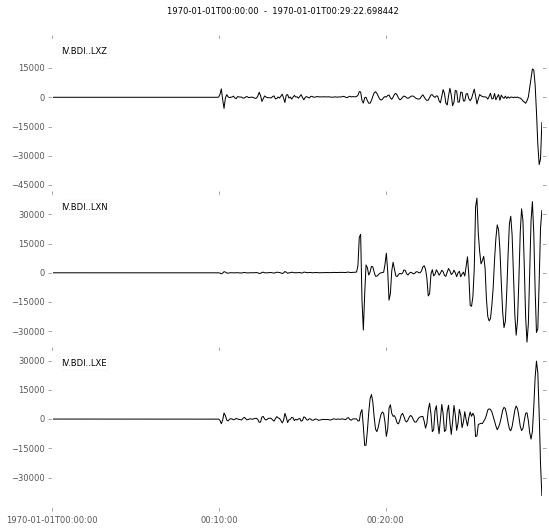

In [7]:
st = db.get_seismograms(source=src, receiver=rec)
st.plot();

## Exercise

**Task:** Calculate three component synthetics for the stations and events used on Monday and today and save them in on disc organized so that you can work with them tomorrow.

#### Notes

1. Receiver objects can also be created from StationXML, SEED, or STATIONS files; see the [documentation](http://www.instaseis.net/source.html) for details.
2. Source objects can also be created from QuakeML, CMTSOLUTIONS, and in other ways; see the [documentation](http://www.instaseis.net/source.html) for details.
3. The `get_seismograms()` method has a couple of extra arguments:
    A. `kind`: `displacement`, `velocity`, `acceleration`
    B. `remove_source_shift`, `reconvolve_stf`, `dt`, ... see the [documentation](http://www.instaseis.net/instaseis.html#instaseis.base_instaseis_db.BaseInstaseisDB.get_seismograms) for details.

## Advanced Exercise 1: Plot Record Section

Use Instaseis to calculate a record section of your choosing.

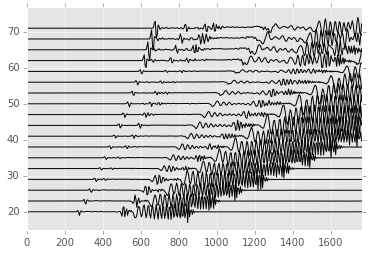

In [8]:
import matplotlib.pylab as plt

for dist in range(20, 72, 3):
    rec = instaseis.Receiver(latitude=0, longitude=dist)
    src = instaseis.Source(latitude=0, longitude=0, depth_in_m=12000.0,        
                           m_rr=1.730000e+27, m_tt=-1.790000e+27, m_pp=5.600000e+25,
                           m_rt=7.520000e+27, m_rp=-5.870000e+26, m_tp=4.540000e+26)
    
    tr = db.get_seismograms(source=src, receiver=rec, components=["Z"])[0]
    tr.normalize()
    plt.plot(tr.times(), tr.data * 3 + dist, color="black")
    
plt.xlim(tr.times()[0], tr.times()[-1])
plt.ylim(15, 77)
plt.show()

## Advanced Exercise 2: PGA as a function of distance and source depth

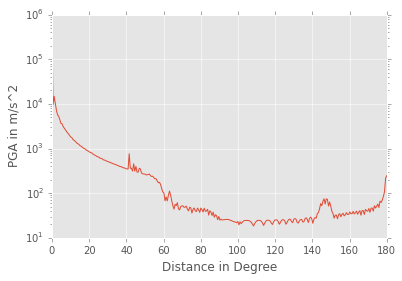

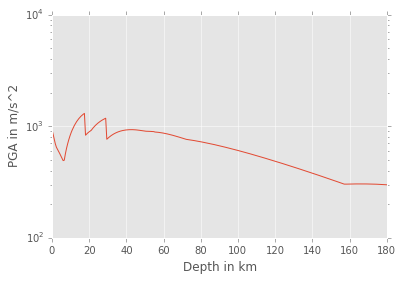

In [10]:
import numpy as np

# Scenario 1: Fixed depth, change distance.
pga = []
distances = []
for dist in np.linspace(0, 180, 300):
    rec = instaseis.Receiver(latitude=0, longitude=dist)
    src = instaseis.Source(latitude=0, longitude=0, depth_in_m=12000.0,        
                           m_rr=1.730000e+27, m_tt=-1.790000e+27, m_pp=5.600000e+25,
                           m_rt=7.520000e+27, m_rp=-5.870000e+26, m_tp=4.540000e+26)
    
    tr = db.get_seismograms(source=src, receiver=rec, components=["Z"], kind="acceleration")[0]
    pga.append(np.abs(tr.data).max())
    distances.append(dist)

plt.semilogy(distances, pga)
plt.xlabel("Distance in Degree")
plt.ylabel("PGA in m/s^2")
plt.show();

# Scenario 2: Fixed distance, change depth.
pga = []
depths = []
for depth in np.linspace(0, 150, 300):
    rec = instaseis.Receiver(latitude=0, longitude=15)
    src = instaseis.Source(latitude=0, longitude=0, depth_in_m=depth * 1000.0,        
                           m_rr=1.730000e+27, m_tt=-1.790000e+27, m_pp=5.600000e+25,
                           m_rt=7.520000e+27, m_rp=-5.870000e+26, m_tp=4.540000e+26)
    
    tr = db.get_seismograms(source=src, receiver=rec, components=["Z"], kind="acceleration")[0]
    pga.append(np.abs(tr.data).max())
    depths.append(depth)

plt.semilogy(distances, pga)
plt.xlabel("Depth in km")
plt.ylabel("PGA in m/s^2")
plt.show();

### Advanced Exercise 3: Spectra of Earthquake Source vs Meteorite Impact